In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sp
import seaborn as sns
    
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
 
from sklearn.linear_model import LinearRegression as lm
import statsmodels.api as sm

In [2]:
 # create a differenced series- get only random fluctuations
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return (diff)

In [3]:
# Create large images!
register_matplotlib_converters()
sns.set_style("darkgrid")
plt.rc("figure", figsize=(16, 12)) # was 14,8
plt.rc("font", size=13)

# Sales Data

In [4]:
import pip
pip.main(["install", "openpyxl"])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: openpyxl in c:\users\ishangi jain\appdata\local\programs\python\python310\lib\site-packages (3.0.10)

Requirement already satisfied: et-xmlfile in c:\users\ishangi jain\appdata\local\programs\python\python310\lib\site-packages (from openpyxl) (1.1.0)

0

In [5]:
import glob
import pandas as pd

# get data file names
path =r'D:\Ishangi_comeback\Aegis\Aegis_Advanced_Stats\Final_Assignment\Raw_data'
filenames = glob.glob(path + "/*.xlsx")

dfs = []

for df in dfs: 
    xl_file = pd.ExcelFile(filenames)

In [6]:
# it is the real data for a company's Local Volume
Cast = pd.read_excel("Sales_Data.xlsx") # data is taken every day
Cast.head(20)

,Account Period,Local Volume
0,AY2016P01,3532792.50
1,AY2016P02,3549664.80
2,AY2016P03,3970284.63
3,AY2016P04,3679121.10
4,AY2016P05,3806548.60
5,AY2016P06,4134018.70
6,AY2016P07,3274831.80
7,AY2016P08,3479610.00
8,AY2016P09,3891123.48
9,AY2016P10,3663367.60


In [7]:
Cast.shape

(24, 2)

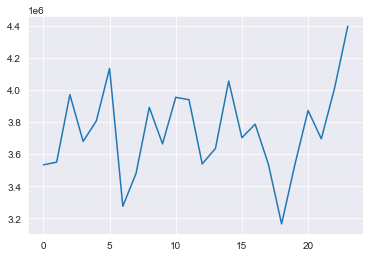

In [8]:
plt.plot(Cast['Local Volume'])

In [9]:
df=Cast['Local Volume']
df.shape

(24,)

In [10]:
sm.tsa.stattools.adfuller(df)

#IN ADF test, H0: Data is NOT STATIONARY
#             H1: Data is STATIONARY

#In result, 2nd value is p-value which is <0.05 hence, Null hypothesis can be rejected(H1: Data is STATIONARY).

(-4.211284062388322,
 0.0006305122698150682,
 7,
 16,
 {'1%': -3.9240193847656246, '5%': -3.0684982031250003, '10%': -2.67389265625},
 377.7947689936247)

In [11]:
# As the data is already stationay, no need for detrending or deseasonalizing the data.
# The STL decomposition also supports the same
#df_diff1 = difference(df, 1)

In [12]:
# Creating STL decomposition
from statsmodels.tsa.seasonal import STL

In [13]:
stl = STL(df, period=12)


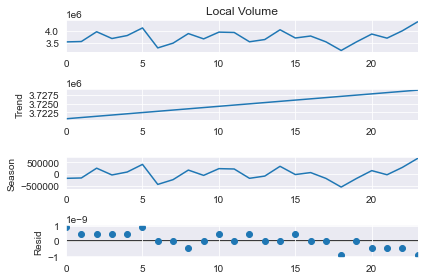

In [14]:
res = stl.fit()
fig = res.plot()

Split data into train and test (70-30)

In [15]:
#from sklearn.model_selection import train_test_split
# this will not work, because, it will take the data randomly and break the sequence

ratio = len(df)*7//10 # taking 70-30 split for train and test
train = df.iloc[:ratio,]
test=df.iloc[ratio:,]

In [16]:
train.shape

(16,)

In [17]:
test.shape

(8,)

# M1- ARIMA

In [18]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf

C:\Users\Ishangi Jain\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


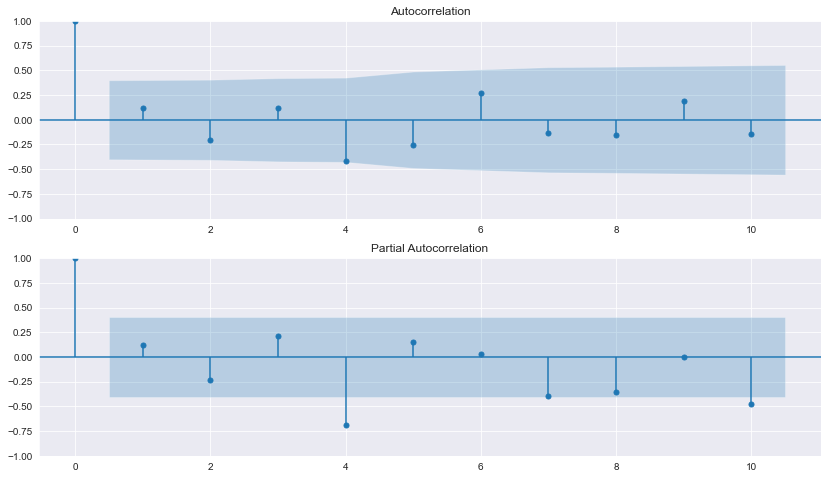

In [19]:
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df, lags=10, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df, lags=10, ax=ax2)

In [20]:
sm.tsa.stattools.arma_order_select_ic(df)

C:\Users\Ishangi Jain\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'bic':             0           1           2
 0  728.526059  676.405459  674.409406
 1  678.004987  676.804562  676.531019
 2  679.871509  679.025804  679.590855
 3  682.223150  681.795629  682.589765
 4  672.791207  676.041092  676.148249,
 'bic_min_order': (4, 0)}

In [21]:
# As per the ACF, PACF plot, p=0,q=0.
# Conclusion: It is a model explained by Random Walk/ Naive model
M1 = sm.tsa.arima.ARIMA(train,order=(0,1,0),seasonal_order=(0,0,0,0))
#my_model = sm.tsa.arima.ARIMA(tdf,order=(1,2,1),seasonal_order=(0,1,0,12))
M1_res = M1.fit()
print(M1_res.summary())

                               SARIMAX Results                                
Dep. Variable:           Local Volume   No. Observations:                   16
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -213.200
Date:                Mon, 29 Aug 2022   AIC                            428.399
Time:                        22:35:05   BIC                            429.107
Sample:                             0   HQIC                           428.392
                                 - 16                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.214e+11   4.36e+10      2.786      0.005     3.6e+10    2.07e+11
Ljung-Box (L1) (Q):                   3.05   Jarque-Bera (JB):                 1.59
Prob(Q):                              0.08   Pr

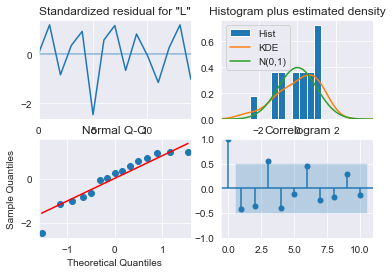

In [22]:
pred = M1_res.plot_diagnostics()

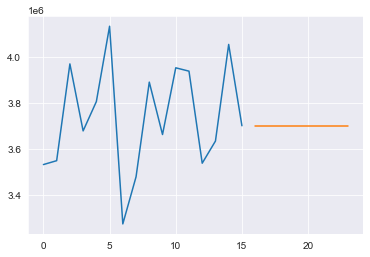

In [23]:
tforecast =  M1_res.forecast(8)
plt.plot(train)
plt.plot(tforecast)

In [24]:
tpredict =  M1_res.predict(1)

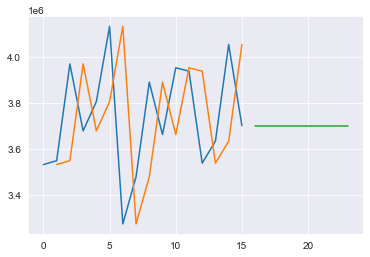

In [25]:
plt.plot(train) # blue
plt.plot(tpredict)#orange
plt.plot(tforecast) #green

In [26]:
tforecast2 = M1_res.get_forecast(8)
confint = np.array(tforecast2.conf_int())

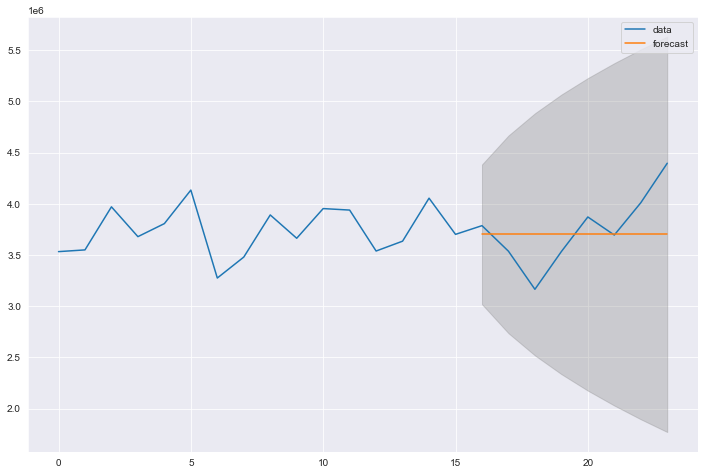

In [27]:
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(df.index, df, label='data')
ax.plot(tforecast2.predicted_mean.index, tforecast2.predicted_mean, label='forecast')
ax.fill_between(tforecast2.predicted_mean.index, confint[:,0], confint[:,1],color='gray',alpha=0.3)
ax.legend()

In [28]:
#RMSE for test data for M1(ARIMA)
from sklearn.metrics import mean_squared_error
RMSE=mean_squared_error(test,tforecast,squared=False)
RMSE

345988.91737608355

In [29]:
# Calculating R-Squared to evaluate the model
#The ideal value for R-squared is 1 for best fit model
#Value of R-square can also be negative when the model fitted is worse than the average fitted model. 

from sklearn.metrics import r2_score

r2 = r2_score(test, tforecast)
r2

-0.019490926331146463

# M2- AutoARIMA

In [30]:
# !pip install pmdarima

In [31]:
import pmdarima as pm

In [32]:
# The parameter is set to : seasonal=False 
M2 = pm.auto_arima(train,start_p=0, start_q=0,
                             max_p=5, max_q=5, m=12,
                             start_P=0, seasonal=False,
                             d=1, D=1, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=430.353, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=432.086, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=432.069, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=428.399, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=433.914, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.088 seconds


C:\Users\Ishangi Jain\AppData\Local\Programs\Python\Python310\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


In [33]:
M2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   16
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -213.200
Date:                Mon, 29 Aug 2022   AIC                            428.399
Time:                        22:35:06   BIC                            429.107
Sample:                             0   HQIC                           428.392
                                 - 16                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.214e+11   4.36e+10      2.786      0.005     3.6e+10    2.07e+11
===================================================================================
Ljung-Box (L1) (Q):                   3.05   Jarque-Bera (JB):                 1.59
Prob(Q):                              0.08   Prob(JB):                         0.45
Heteroskedasticity (H):               1.22   Skew:                            -0.80
Prob(H) (two-sided):                  0.83   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

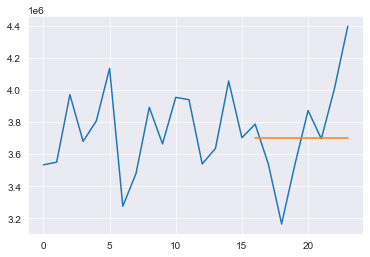

In [34]:
M2.fit(train)
fc = M2.predict(8)
plt.plot(df)
plt.plot(np.arange(16,16+8,1),fc)

In [35]:
#RMSE for test data for M2 (Auto-ARIMA)
from sklearn.metrics import mean_squared_error
RMSE=mean_squared_error(test,fc,squared=False)
RMSE

345988.91737608355

In [36]:
from sklearn.metrics import r2_score

r2 = r2_score(test, fc)
r2

-0.019490926331146463

# M3- Holts Winter's Model

# Simple Exponential Smoothing: Level 

In [37]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [38]:
ses = SimpleExpSmoothing(train)

In [39]:
type(ses)

statsmodels.tsa.holtwinters.model.SimpleExpSmoothing

In [40]:
result1 = ses.fit(smoothing_level=0.5, optimized=False)

In [41]:
result1.summary()

Dep. Variable:,Local Volume,No. Observations:,16
Model:,SimpleExpSmoothing,SSE,1307257007250.377
Optimized:,False,AIC,406.022
Trend:,None,BIC,407.567
Seasonal:,None,AICC,409.658
Seasonal Periods:,None,Date:,"Mon, 29 Aug 2022"
Box-Cox:,False,Time:,22:35:06
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5000000,alpha,False
initial_level,3.5328e+06,l.0,False


In [42]:
mypred = result1.predict(start=1, end=24)

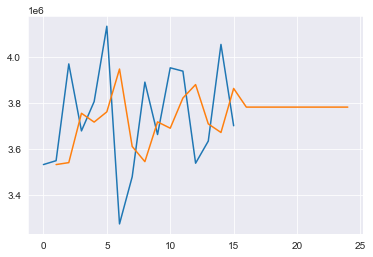

In [43]:
plt.plot(train)
plt.plot(mypred)

In [44]:
result1.params

{'smoothing_level': 0.5,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 3532792.5,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

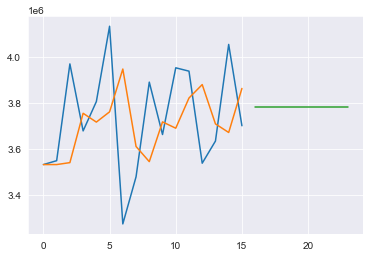

In [45]:
plt.plot(train)
plt.plot(result1.fittedvalues)
plt.plot(result1.forecast(8))

In [46]:
result2 = ses.fit(smoothing_level=0.6, optimized=False) # optimize the values of alpha from 0.5 to 0.6

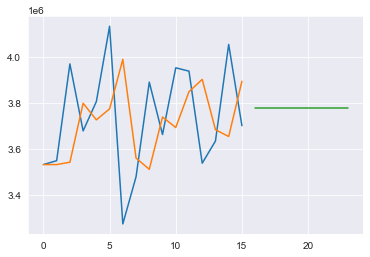

In [47]:
plt.plot(train)
plt.plot(result2.fittedvalues)
plt.plot(result2.forecast(8))

In [48]:
result2.params

{'smoothing_level': 0.6,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 3532792.5,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

# Holt's linear trend values: Level+Trend

In [49]:
from statsmodels.tsa.holtwinters import Holt

In [50]:
model = Holt(train)
result3 = model.fit()
result3.params

C:\Users\Ishangi Jain\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


{'smoothing_level': 0.005,
 'smoothing_trend': 0.005,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 3532792.5,
 'initial_trend': 16872.299999999814,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [51]:
result3.summary()

Dep. Variable:,Local Volume,No. Observations:,16
Model:,Holt,SSE,905990703716.481
Optimized:,True,AIC,404.155
Trend:,Additive,BIC,407.246
Seasonal:,None,AICC,413.489
Seasonal Periods:,None,Date:,"Mon, 29 Aug 2022"
Box-Cox:,False,Time:,22:35:07
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0050000,alpha,True
smoothing_trend,0.0050000,beta,True


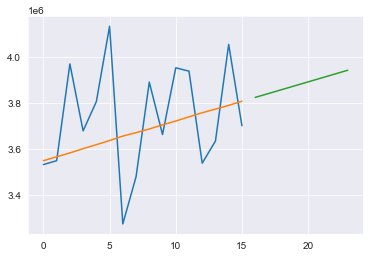

In [52]:
plt.plot(train)
plt.plot(result3.fittedvalues)
plt.plot(result3.forecast(8))

# Final Holtz Winter Model: Level+Trend+Seasonality

In [53]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [61]:
# there is no seasonality in this data
model = ExponentialSmoothing(train, trend='add')

In [62]:
result4 = model.fit()
result4.params

C:\Users\Ishangi Jain\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


{'smoothing_level': 0.005,
 'smoothing_trend': 0.0001,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 3690582.463999998,
 'initial_trend': 1373.4285454547498,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [63]:
result4.summary()

Dep. Variable:,Local Volume,No. Observations:,16
Model:,ExponentialSmoothing,SSE,861294968352.427
Optimized:,True,AIC,403.346
Trend:,Additive,BIC,406.436
Seasonal:,None,AICC,412.679
Seasonal Periods:,None,Date:,"Mon, 29 Aug 2022"
Box-Cox:,False,Time:,22:35:52
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0050000,alpha,True
smoothing_trend,0.0001,beta,True


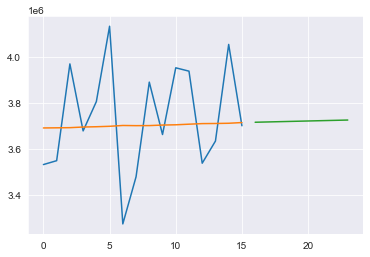

In [64]:
plt.plot(train)
plt.plot(result4.fittedvalues)
plt.plot(result4.forecast(8))

In [65]:
from sklearn.metrics import mean_squared_error
RMSE=mean_squared_error(test,result4.forecast(8),squared=False)
RMSE

341660.22525410313

In [66]:
from sklearn.metrics import r2_score

r2 = r2_score(test, result4.forecast(8))
r2

0.005859343874099476

# Conclusion: Holtz Winter's model is the preferred model for this data as it is showing better R-squared value and better accuracy.